This capstone projet is using data from the Kaggle competition:
https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/

For simplicity we will start with only using train_sample.csv. Only later to address the class imbalance, we will consider additional data from train.csv.

# Data Wrangling

## Data Organization 

In [185]:
# import packages
import os
import numpy as np
import pandas as pd
from zipfile import ZipFile
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
# Set-up path
path="/Users/carolewaihai/Documents/springboard/orchid/Capstone2_TalkingData"
os.chdir(path)

# Create folders to keep the data organized

In [187]:
mkdir data\raw\zip

mkdir: datarawzip: File exists


In [188]:
mkdir data\interim

mkdir: datainterim: File exists


## Data Collection: TalkingData Ad Tracking Fraud (Kaggle)

In [189]:
## Run this only once!

# talkingdata-adtracking-fraud-detection.zip was downloaded from kaggle and store in data/raw/zip
# Unzip files to into data/raw

#zipfile = ZipFile("data/raw/zip/talkingdata-adtracking-fraud-detection.zip", mode='r')
#zipfile.extractall('data/raw/')

In [190]:
# Open train_sample.csv into a dataframe
df = pd.read_csv('data/raw/train_sample.csv')
print(df.head())

       ip  app  device  os  channel           click_time attributed_time  \
0   87540   12       1  13      497  2017-11-07 09:30:38             NaN   
1  105560   25       1  17      259  2017-11-07 13:40:27             NaN   
2  101424   12       1  19      212  2017-11-07 18:05:24             NaN   
3   94584   13       1  13      477  2017-11-07 04:58:08             NaN   
4   68413   12       1   1      178  2017-11-09 09:00:09             NaN   

   is_attributed  
0              0  
1              0  
2              0  
3              0  
4              0  


In [191]:
# Check general information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [192]:
# Explore df
df.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


**Observation on the data**
* The data is tidy (1 column = 1 variable, 1 row = 1 observation).
* The column 'attributed_time' is the only column with empty values.
* The only thing to fix is to change the type 'object' from columns 'click_time' and 'attributed_time' into datetime type.

## Data Definition 

In [193]:
#review the columns
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [194]:
# Open the columns description text file.
f = open("columns_definition.txt", "r") 
print(f.read())

Columns definitions

ip: ip address of click.
app: app id for marketing.
device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
os: os version id of user mobile phone
channel: channel id of mobile ad publisher
click_time: timestamp of click (UTC)
attributed_time: if user download the app for after clicking an ad, this is the time of the app download
is_attributed: the target that is to be predicted, indicating the app was downloaded

Note that ip, app, device, os, and channel are encoded.



## Data Cleaning 

### Data types 

In [195]:
# Changing data type of click_time and attributed_time
df.click_time = pd.to_datetime(df.click_time)
df.attributed_time = pd.to_datetime(df.attributed_time)

### Null values 

Only attributed_time has null value when the click has not been attributed to any installs. We decide to leave the null value as is. Our target variable is is_attributed, and only attributed click get an 'attributed_time'. In our current problem of predicting if a click will be attributed or not, the column 'attributed_time' is useless and can be dropped.

In [196]:
# Drop column 'attributed_time'
df.drop(columns=['attributed_time'], inplace=True)

### Duplicated values 

In [197]:
# Search for duplicated rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,ip,app,device,os,channel,click_time,is_attributed
84125,871,12,1,13,178,2017-11-08 10:00:05,0


In [198]:
df = df.drop_duplicates()

### Quick check for anomalies

In [199]:
# Exploration of min max values
df.agg([min,max]).T

,min,max
ip,9,364757
app,1,551
device,0,3867
os,0,866
channel,3,498
click_time,2017-11-06 16:00:00,2017-11-09 15:59:51
is_attributed,0,1


In [200]:
# Check df again after clean up and save the data in folder data/interim
df.info()
df.to_csv('data/interim/talkingdata_clicks.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ip             99999 non-null  int64         
 1   app            99999 non-null  int64         
 2   device         99999 non-null  int64         
 3   os             99999 non-null  int64         
 4   channel        99999 non-null  int64         
 5   click_time     99999 non-null  datetime64[ns]
 6   is_attributed  99999 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 6.1 MB


# Exploratory Data Analysis (EDA) 

## Investigating each column 

In [201]:
# Check the cardinality of each variable (how many uniques values)
df.apply(pd.Series.nunique)

ip               34857
app                161
device             100
os                 130
channel            161
click_time       80350
is_attributed        2
dtype: int64

**Observations**
* click_time has the highest cardinality, it makes sense has it is time related (clicks rarely happened at the same time).
* ip address is the other only variable with high cardinality.
* app and channel have the same number of unique value, we need to check if it is a coincidence or 1 app = 1 channel.
* we could consider reducing the number of values of ip, app, device, os, channel

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c6df890>,
      dtype=object)

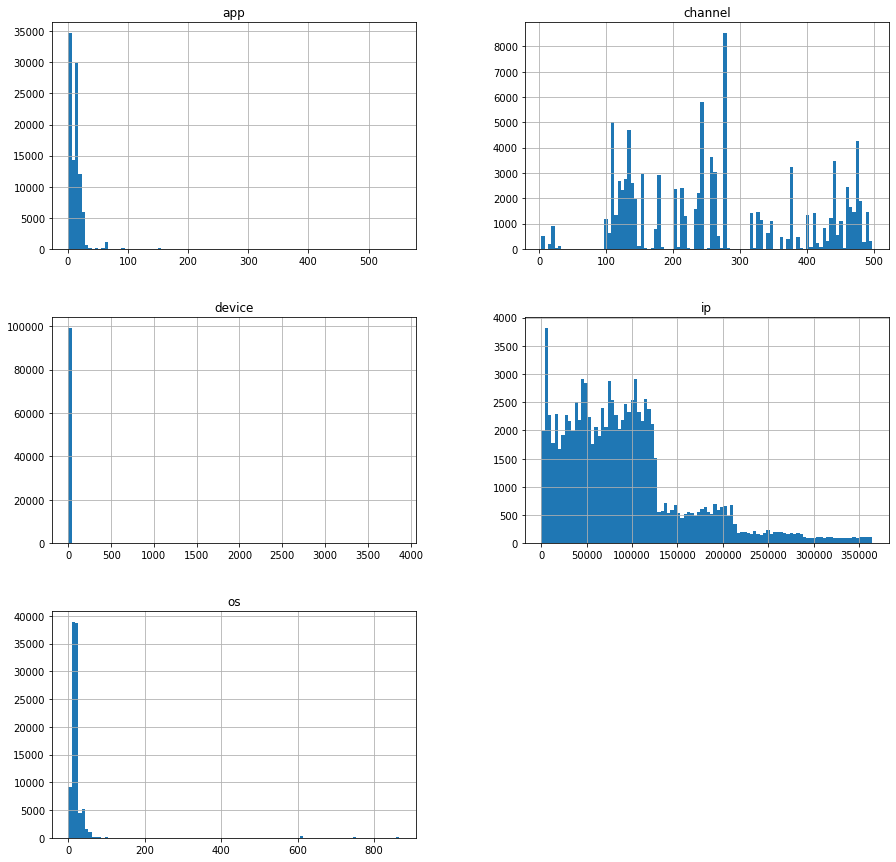

In [202]:
# Use histogram to build data profiles
df[['ip','app','device','os','channel']].hist(bins=100, figsize=(15, 15), layout=(3, 2), sharey=False)

**Observations**
* app and channel are not distributed similarly, so the 161 uniques values are a coincidence.
* When encoding the categorical value into number, lower numbers are usually choose for the more frequent values.

### ip

In [203]:
# Investigating top 10 most frequent ip
ip_cnt = df.ip.value_counts()
ip_pct = df.ip.value_counts()/len(df.ip)
ip_list = ip_pct.head(10)
if len(ip_pct) > 10:
    ip_list['999999'.format(len(ip_pct) - 10)] = sum(ip_pct[10:])
    
print(ip_list)

5348      0.00669
5314      0.00616
73487     0.00439
73516     0.00399
53454     0.00280
114276    0.00219
26995     0.00218
95766     0.00205
17149     0.00186
100275    0.00173
999999    0.96596
Name: ip, dtype: float64


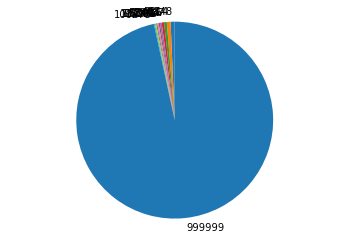

In [204]:
fig, ax = plt.subplots()
pieLabels = ip_list.index
 
# Draw the pie chart
ax.pie(ip_list.values,
        labels=pieLabels,
        startangle=90)

 
# Aspect ratio - equal means pie is a circle
ax.axis('equal')

plt.show()

In [205]:
#How many (and what pourcentage) of ip address appear only once?
print("There are",sum(ip_cnt.values==1),
      "ip address that appears only once, they represent",
      sum(ip_cnt.values==1)/len(ip_cnt)*100,"% of all ip addresses") 

There are 17423 ip address that appears only once, they represent 49.98422124680839 % of all ip addresses


**Observation**
* The top 10 ip addresses only account 3.5% of all the clicks.
* 50% of all ip addresses only have 1 clicks. Such ip addresses wont be useful to predict if a click will turned into an install.

### device

In [206]:
# Investigating top 10 most frequent devices
device_cnt = df.device.value_counts()
device_pct = df.device.value_counts()/len(df.device)
device_list = device_pct.head(10)
if len(device_pct) > 10:
    device_list['999999'.format(len(device_pct) - 10)] = sum(device_pct[10:])
    
print(device_list)

1         0.943379
2         0.043450
0         0.005410
3032      0.003710
3543      0.001510
3866      0.000930
59        0.000120
6         0.000080
16        0.000070
5         0.000070
999999    0.001270
Name: device, dtype: float64


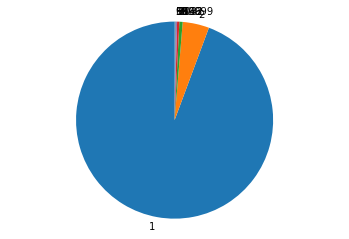

In [207]:
fig, ax = plt.subplots()
pieLabels = device_list.index
 
# Draw the pie chart
ax.pie(device_list.values,
        labels=pieLabels,
        startangle=90)

 
# Aspect ratio - equal means pie is a circle
ax.axis('equal')
plt.show()

**Observation**
* 98% of all the click comes from 2 devices.
* Other devices might not be important in predicting an installs.

### os

In [208]:
# Investigating top 10 most frequent os
os_cnt = df.os.value_counts()
os_pct = df.os.value_counts()/len(df.os)
os_list = os_pct.head(10)
if len(os_pct) > 10:
   os_list['999999'.format(len(os_pct) - 10)] = sum(os_pct[10:])
    
print(os_list)

19        0.238702
13        0.212222
17        0.052321
18        0.048300
22        0.040390
10        0.028160
8         0.027750
6         0.025200
15        0.023960
20        0.023470
999999    0.279523
Name: os, dtype: float64


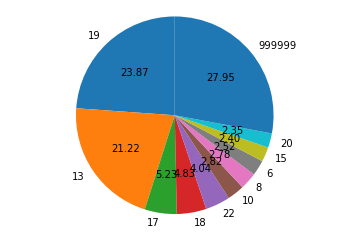

In [209]:
fig, ax = plt.subplots()
pieLabels = os_list.index
 
# Draw the pie chart
ax.pie(os_list.values,
        labels=pieLabels,
        autopct='%1.2f',
        startangle=90)

 
# Aspect ratio - equal means pie is a circle
ax.axis('equal')
plt.show()

**Observation**
* The top 2 OS account for 45% of all the clicks.
* The top 10 OS account for 72% of all the clicks.

### app & channel

3         0.182792
12        0.131971
2         0.117371
9         0.089921
15        0.085951
18        0.083151
14        0.053591
1         0.031350
13        0.024220
8         0.020040
999999    0.179642
Name: app, dtype: float64


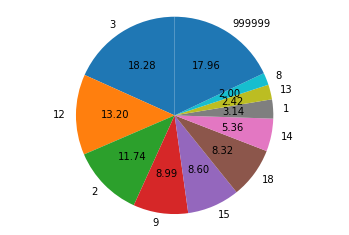

280       0.081141
245       0.048020
107       0.045430
477       0.039600
134       0.032240
259       0.031300
265       0.030130
153       0.029540
178       0.029350
121       0.024720
999999    0.608526
Name: channel, dtype: float64


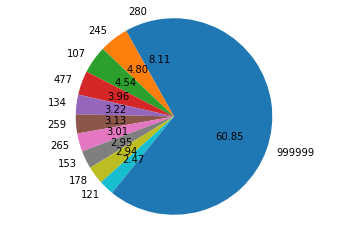

In [210]:
for i in ['app','channel']:
    # Investigating top 10 most frequent devices
    i_cnt = df[i].value_counts()
    i_pct = df[i].value_counts()/len(df.os)
    i_list = i_pct.head(10)
    if len(i_pct) > 10:
       i_list['999999'.format(len(i_pct) - 10)] = sum(i_pct[10:])
    
    print(i_list)
    fig, ax = plt.subplots()
    pieLabels = i_list.index
 
    # Draw the pie chart
    ax.pie(i_list.values,
        labels=pieLabels,
        autopct='%1.2f',
        startangle=90)

 
    # Aspect ratio - equal means pie is a circle
    ax.axis('equal')
    plt.show()

**Observation**
* The top 10 apps represent 82% of all clicks.
* The top 10 channels represent only 40% of all clicks.

### click_time

All clicks happen within 3 days, between Nov 6 to 9, 2017, 16:00. The timezone is unknown.

Text(0, 0.5, 'Number of Clicks')

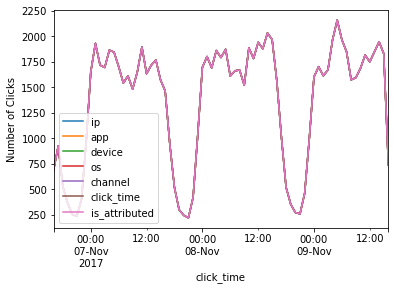

In [211]:
#round the time to nearest hour
click_time_h = df['click_time'].dt.round('H')  

#check for hourly patterns
df.groupby(click_time_h, as_index=True).count().plot()
plt.ylabel('Number of Clicks')

**Observation**
* We can see a clear hourly click patterns following people life habits (less click during night time).
However there are not enough attributed clicks to see similar hourly patterns. Attributed clicks seems more randoms.

### is_attributed (target variable)

In [212]:
df.is_attributed.value_counts()

0    99772
1      227
Name: is_attributed, dtype: int64

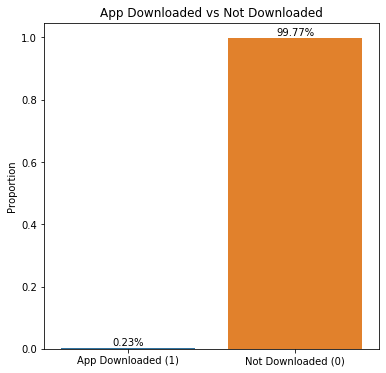

In [213]:
#Let's explore the is_attributed column
plt.figure(figsize=(6,6))
mean = (df.is_attributed.values == 1).mean() #get the pourcentage of clicks attributed

ax = sns.barplot(['App Downloaded (1)', 'Not Downloaded (0)'], [mean, 1-mean])
ax.set(ylabel='Proportion', title='App Downloaded vs Not Downloaded')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

**Observation**
* The dataset show an important inbalance in the number of click attributed (227) vs non-attributed (99,772).

## Fixing the class imbalance 

### 1st batch of additional attributed clicks

In [169]:
# Faster way to load the data by batch
# Open a connection to the file

added_clicks = []


with open('data/raw/train.csv', encoding='utf-8-sig') as file:

    # Process only the first 10 rows
    for j in range(0,10000000):

        
        # Split the current line into a list: line
        line = file.readline().split(',')
        if line.count('1\n')==1:
            added_clicks.append(line)

len(added_clicks)

18717

In [176]:
# Turn the new data into a dataframe and check it
added_clicks_df = pd.DataFrame(added_clicks)
added_clicks_df.head()

,0,1,2,3,4,5,6,7
0,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1\n
1,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,1\n
2,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,1\n
3,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,1\n
4,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,1\n


In [177]:
# Fix the columns names
column_name = pd.read_csv('data/raw/train_sample.csv').columns
added_clicks_df.columns=column_name

In [178]:
# Drop columns attributed_time and fix the value in column is_attributed
added_clicks_df.drop(columns=['attributed_time','is_attributed'], inplace=True)
added_clicks_df['is_attributed']=1
added_clicks_df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,204158,35,1,13,21,2017-11-06 15:41:07,1
1,29692,9,1,22,215,2017-11-06 16:00:02,1
2,64516,35,1,13,21,2017-11-06 16:00:02,1
3,172429,35,1,46,274,2017-11-06 16:00:03,1
4,199085,35,1,13,274,2017-11-06 16:00:04,1


In [179]:
# Check at a high level the value in this additional dataset
added_clicks_df.agg([min,max]).T

,min,max
ip,100009,99986
app,0,98
device,0,99
os,0,96
channel,0,498
click_time,2017-11-06 15:41:07,2017-11-07 00:12:03
is_attributed,1,1


In [180]:
added_clicks_df.apply(pd.Series.nunique)

ip               16112
app                133
device             438
os                  67
channel            138
click_time       12676
is_attributed        1
dtype: int64

**Observations**
* The 18717 additional attributed cicks we got from the test.csv file only cover a timeframe of 9h. 
* Ideally we would want these attributed clicks to be distributed between 2017-11-06 and 2017-11-09 like the first dataset.

Let get more attributed clicks from train.csv

### 2nd batch of additional attributed clicks 

In [124]:
# Run this one only once

# Get all the attributed clicks from test.csv from line 10,000,000 to the end of the file
added_clicks2 = []

with open('data/raw/train.csv', encoding='utf-8-sig') as file:

    # Skip the fiest 10,000,000 rows
    for j in range(10000000):
        next(file, None)
    # Collect all attributed clicks until the end of the file
#    for line in file:
#       line = file.readline().split(',')
#       if line.count('1\n')==1:
#            added_clicks2.append(line)

len(added_clicks2)

218955

In [128]:
# Turn the new data into a dataframe and check it
added_clicks2_df = pd.DataFrame(added_clicks2)
# Fix the columns names, drop attributed_time and fix the value in is_attributed
added_clicks2_df.columns=column_name
added_clicks2_df.drop(columns=['attributed_time','is_attributed'], inplace=True)
added_clicks2_df['is_attributed']=1
added_clicks2_df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,141607,66,1,10,101,2017-11-07 00:12:04,1
1,58994,15,1,13,315,2017-11-07 00:12:04,1
2,77498,19,0,24,213,2017-11-07 00:12:06,1
3,38720,35,1,19,21,2017-11-07 00:12:06,1
4,71488,35,1,13,21,2017-11-07 00:12:08,1


In [129]:
# Check at a high level the value in this additional dataset
added_clicks2_df.agg([min,max]).T

,min,max
ip,1,99998
app,0,98
device,0,990
os,0,99
channel,0,5
click_time,2017-11-07 00:12:04,2017-11-09 15:59:26
is_attributed,1,1


**Observation**
* Now we have attributed clicks distributed from 2017-11-06 to 2017-11-09.
* If we add the 3 datasets together, we will have more than 2x more attributed clicks than non-attributed. We can sample 1 out of 3 attributed clicks before adding them to the main dataset.

### Sampling and appending datasets 

In [132]:
# Concatenate both added_clicks datasets
added_clicks_main = pd.concat([added_clicks_df, added_clicks2_df], axis=0, ignore_index=True)
print(added_clicks_main.head(),added_clicks_main.tail())

       ip app device  os channel           click_time  is_attributed
0  204158  35      1  13      21  2017-11-06 15:41:07              1
1   29692   9      1  22     215  2017-11-06 16:00:02              1
2   64516  35      1  13      21  2017-11-06 16:00:02              1
3  172429  35      1  46     274  2017-11-06 16:00:03              1
4  199085  35      1  13     274  2017-11-06 16:00:04              1             ip app device  os channel           click_time  is_attributed
237667    1883  10      1   7     113  2017-11-09 15:59:08              1
237668  346662  45      1  11     419  2017-11-09 15:59:13              1
237669  313982  10      1  27     113  2017-11-09 15:59:21              1
237670   29789  45      1  32     419  2017-11-09 15:59:26              1
237671  308776  10      1  11     113  2017-11-09 15:59:26              1


In [134]:
# Find and drop duplicates
duplicateRowsDF = added_clicks_main[added_clicks_main.duplicated()]
print(duplicateRowsDF)

added_clicks_main = added_clicks_main.drop_duplicates()

            ip  app device  os channel           click_time  is_attributed
2771     90509   51      0  21     203  2017-11-06 16:39:07              1
2775     46549   35      1  13      21  2017-11-06 16:39:11              1
2912      7813   35      1  18      21  2017-11-06 16:41:27              1
3845    108997   35      1  13      21  2017-11-06 16:58:39              1
4345     76932   35      1  18      21  2017-11-06 17:09:13              1
...        ...  ...    ...  ..     ...                  ...            ...
176594  291256    7      1  13     101  2017-11-09 01:33:51              1
201039   29958    3      1  13     280  2017-11-09 06:53:12              1
202058  329169  163      0   0       4  2017-11-09 07:05:25              1
223823    3289   35      1  22     274  2017-11-09 12:17:49              1
236319   43827   19     29  24     213  2017-11-09 15:21:51              1

[74 rows x 7 columns]


In [136]:
# Sample one out of three clicks
added_clicks_main = added_clicks_main[::3]

In [137]:
len(added_clicks_main)

79200

In [214]:
# Check df columns before concatenating
df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


In [218]:
# Concatenate
df2 = pd.concat([df, added_clicks_main], axis=0, ignore_index=True)

In [220]:
# Check data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179199 entries, 0 to 179198
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ip             179199 non-null  object
 1   app            179199 non-null  object
 2   device         179199 non-null  object
 3   os             179199 non-null  object
 4   channel        179199 non-null  object
 5   click_time     179199 non-null  object
 6   is_attributed  179199 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 9.6+ MB


## Investigating relationship 

In [ ]:
# Does any app run on only 1 channel?
# Does any channel run on only 1 app?
sns.catplot(x="channel", y="app", data=df);

## Feature engineering

### Create feature: user

### Create feature: campaign 

### Create count_of_click

### Create click_hour 

In [ ]:
#extract hour as a feature
df['click_hour']=df['click_time'].dt.hour

### Reducing the number of value for ip, device, os 